<a href="https://colab.research.google.com/github/charles01george/01_Humans_or_Not/blob/main/01_Humans_or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humans or not Humans

This project is for differentiate humans and not-humans from a set of different photos which were taken from mainly phones. The data contains some beautiful pictures (taken by myself 😀) of my family members and friends.

## Get the data

In [1]:
import os
import tensorflow as tf

In [2]:
data = "/content/drive/MyDrive/01_Humans_or_Not"

In [3]:
os.listdir(data)

['Test', 'Train']

In [4]:
os.listdir(os.path.join(data, "Train"))

['humans', 'not_humans']

### Inspect the data

In [5]:
os.listdir(os.path.join(data, "Train", "humans"))[:5]

['0B699446-ECAE-4A34-96E6-51DE3ECDA3EC Small.jpeg',
 '0A40694B-BB3D-4D5C-8BC6-9B0DBD90C58C Small.jpeg',
 '0A8F2502-6427-4730-9960-4BC7EB3B1D90 Small.jpeg',
 '0a754ad1-4640-4de5-8bbd-5f81dbbf904a Small.jpeg',
 '1D50442A-0CC3-41D0-9B97-388A14E81374 Small.jpeg']

In [6]:
os.listdir(os.path.join(data, "Train", "not_humans"))[:5]

['3CC26C46-9F19-425A-B386-56B742745A66 Small.jpeg',
 '1C247B1C-254C-4BE7-BB6F-843A2C39DB7C Small.jpeg',
 '3C72CC29-04D9-4E9D-87C7-4F873E8CE0A6 Small.jpeg',
 '3D0529AD-D8A9-496B-836B-94B52BD89E85 Small.jpeg',
 '0A97A324-04BD-4368-8F97-F1679CDD425E Small.jpeg']

In [7]:
len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/humans"))

507

In [8]:
# How many images are in our dataset
data = tf.keras.utils.image_dataset_from_directory("drive/MyDrive/01_Humans_or_Not")

Found 1090 files belonging to 2 classes.


In [9]:
# Number of training images
tf.keras.utils.image_dataset_from_directory("drive/MyDrive/01_Humans_or_Not/Train/")

Found 1018 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
# How many human images in our training set
num_human_images_train = len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/humans"))
num_human_images_train

507

In [11]:
# How many not-human images in our training set
num_not_human_images_train = len(os.listdir("drive/MyDrive/01_Humans_or_Not/Train/not_humans"))
num_not_human_images_train

511

In [12]:
data = "/content/drive/MyDrive/01_Humans_or_Not/Train"
data

'/content/drive/MyDrive/01_Humans_or_Not/Train'

In [26]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape

  return img

Image shape: (320, 240, 3)


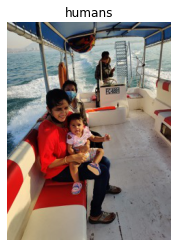

In [29]:
img = view_random_image(target_dir="drive/MyDrive/01_Humans_or_Not/Train/",
                  target_class="humans")

In [30]:
# View the image (array/tensor)
img

array([[[104, 101,  68],
        [179, 176, 157],
        [205, 204, 202],
        ...,
        [ 42,  59, 128],
        [ 45,  56, 110],
        [ 49,  56, 100]],

       [[ 90,  86,  49],
        [ 80,  75,  55],
        [106, 102,  99],
        ...,
        [ 32,  57, 114],
        [ 36,  57, 112],
        [ 32,  54, 103]],

       [[115, 110,  72],
        [107, 101,  77],
        [ 90,  86,  77],
        ...,
        [ 27,  56,  98],
        [ 21,  53,  94],
        [ 10,  43,  84]],

       ...,

       [[176, 160, 124],
        [175, 159, 123],
        [173, 157, 121],
        ...,
        [128, 125, 134],
        [128, 125, 134],
        [127, 124, 133]],

       [[174, 158, 122],
        [174, 158, 122],
        [173, 157, 121],
        ...,
        [128, 125, 134],
        [131, 128, 137],
        [131, 128, 137]],

       [[173, 157, 121],
        [174, 158, 122],
        [174, 158, 122],
        ...,
        [129, 126, 135],
        [127, 124, 133],
        [124, 121, 130]]

In [31]:
# Image shape
img.shape 

(320, 240, 3)

The values in the `img` array are between 0 and 255, however neural networks prefer the values between 0 and 1. One of the most common preprocessign steps for working with images is to `Scale` (normalize) their pixel values by dividing the image arrays by 255

In [32]:
# Get all the pixel values between 0 & 1
img/255.0

array([[[0.40784314, 0.39607843, 0.26666667],
        [0.70196078, 0.69019608, 0.61568627],
        [0.80392157, 0.8       , 0.79215686],
        ...,
        [0.16470588, 0.23137255, 0.50196078],
        [0.17647059, 0.21960784, 0.43137255],
        [0.19215686, 0.21960784, 0.39215686]],

       [[0.35294118, 0.3372549 , 0.19215686],
        [0.31372549, 0.29411765, 0.21568627],
        [0.41568627, 0.4       , 0.38823529],
        ...,
        [0.1254902 , 0.22352941, 0.44705882],
        [0.14117647, 0.22352941, 0.43921569],
        [0.1254902 , 0.21176471, 0.40392157]],

       [[0.45098039, 0.43137255, 0.28235294],
        [0.41960784, 0.39607843, 0.30196078],
        [0.35294118, 0.3372549 , 0.30196078],
        ...,
        [0.10588235, 0.21960784, 0.38431373],
        [0.08235294, 0.20784314, 0.36862745],
        [0.03921569, 0.16862745, 0.32941176]],

       ...,

       [[0.69019608, 0.62745098, 0.48627451],
        [0.68627451, 0.62352941, 0.48235294],
        [0.67843137, 0